In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Load Dataset

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Basic Information

df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
# Missing Values Analysis

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Duplicate Check

df.duplicated().sum()

np.int64(0)

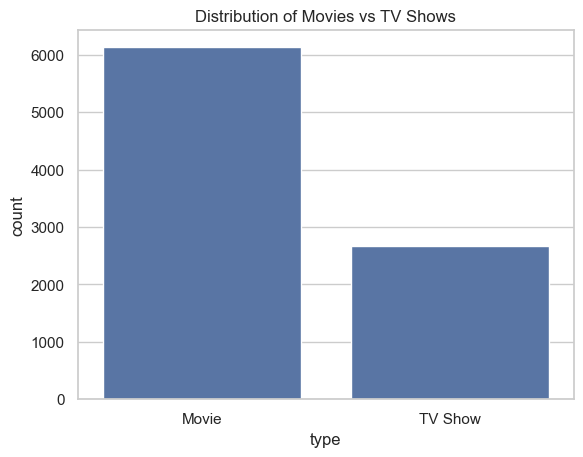

In [6]:
# Univariate Analysis
# 1.Type Distribution

sns.countplot(x="type", data=df)
plt.title("Distribution of Movies vs TV Shows")
plt.show()

The dataset shows that Netflix contains significantly more Movies than TV Shows. 

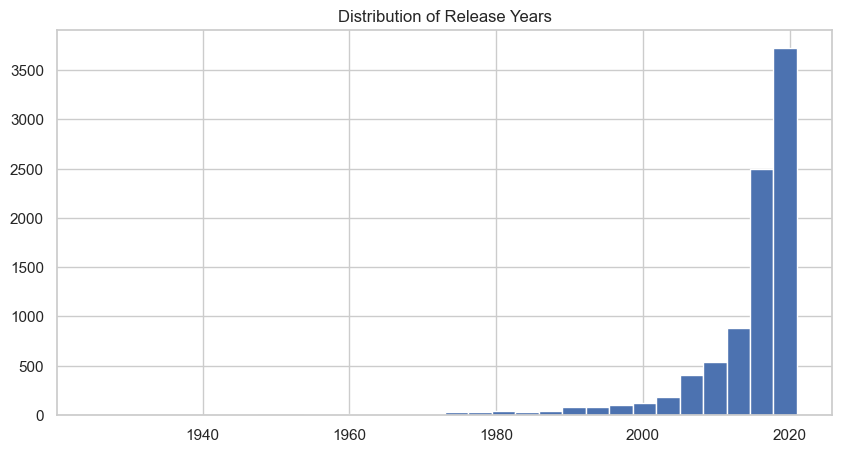

In [7]:
# 2.Release Year Distribution

plt.figure(figsize=(10,5))
df["release_year"].hist(bins=30)
plt.title("Distribution of Release Years")
plt.show()

The distribution of release years shows that most Netflix content was produced in recent decades, particularly after the year 2000. There is a noticeable increase in titles from the 2010s, indicating a focus on modern productions. Older titles exist but represent a much smaller portion of the dataset.

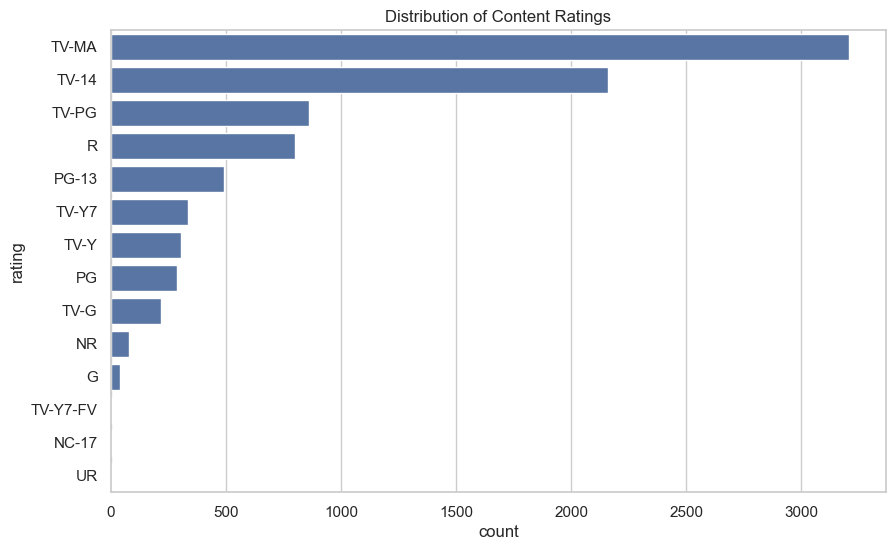

In [21]:
# 3.Rating Distribution

mask = df["rating"].str.contains("min", na=False)
df.loc[mask, "duration"] = df.loc[mask, "rating"]
df.loc[mask, "rating"] = np.nan

plt.figure(figsize=(10,6))
sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

The rating distribution shows that TV-MA and TV-14 are the most common content ratings on Netflix. This indicates that the platform primarily targets teenage and adult audiences. Family-oriented ratings such as PG and G appear less frequently, suggesting a stronger focus on mature content.

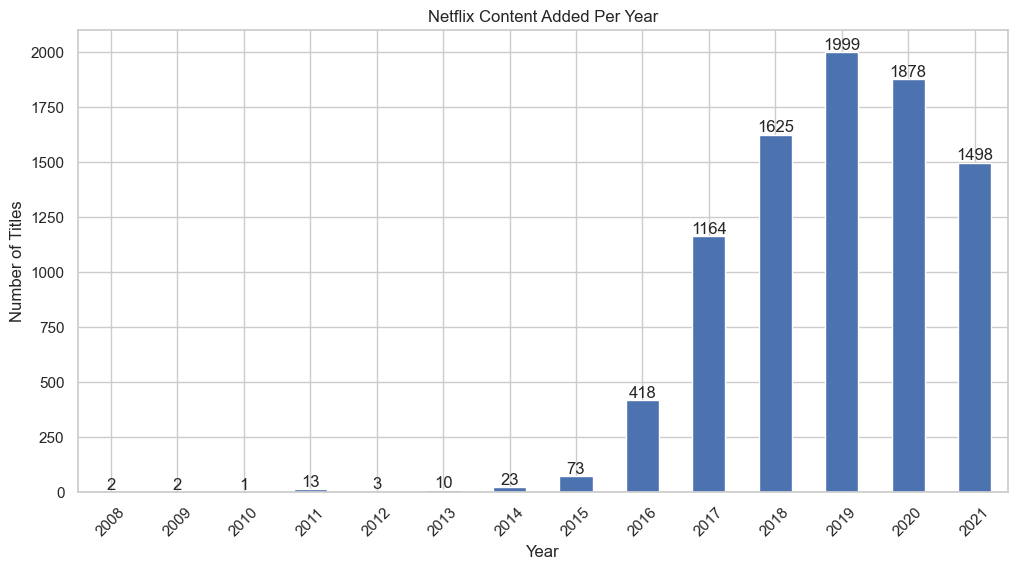

In [16]:
# Bivariate Analysis
# 1. Content Growth Over Time

df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["year_added"] = df["year_added"].astype("Int64")

df_clean = df.dropna(subset=["year_added"])
year_counts = df_clean["year_added"].value_counts().sort_index()

plt.figure(figsize=(12,6))
ax = year_counts.plot(kind="bar")

for i, v in enumerate(year_counts):
    ax.text(i, v + 10, str(v), ha='center')

plt.title("Netflix Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

Netflix significantly accelerated content production after 2016, reaching its highest additions around 2019-2020. This period likely represents aggressive platform growth and global expansion.

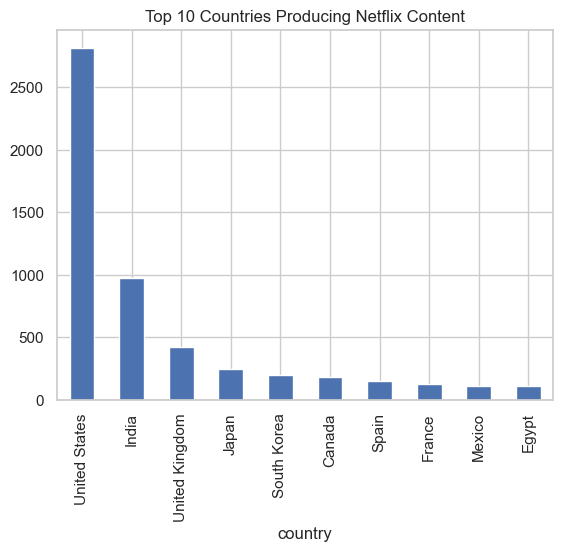

In [14]:
# 2.Top Countries

top_countries = df["country"].value_counts().head(10)

top_countries.plot(kind="bar")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

The United States produces the highest number of titles on Netflix, significantly surpassing other countries. India and the United Kingdom also contribute a substantial amount of content.

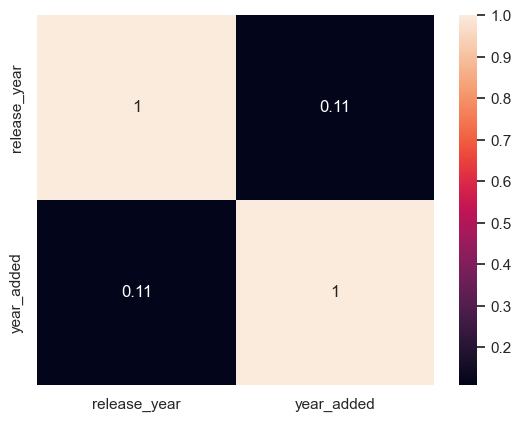

In [15]:
# Correlation

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

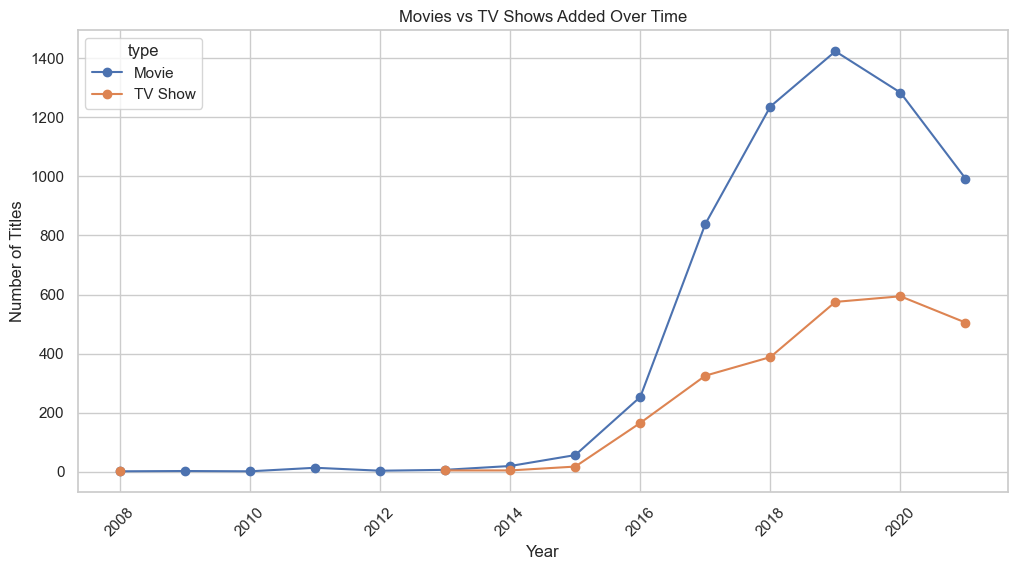

In [18]:
# Line Plot

year_type = df_clean.groupby(["year_added", "type"]).size().unstack()

year_type.plot(figsize=(12,6), marker='o')

plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
Again the dataset shows that Netflix contains significantly more Movies than TV Shows. 